<a href="https://colab.research.google.com/github/baorz-gab/Data-Science-Challenges/blob/main/2021/Data_Science_Challenge_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Challenge 2021

**Author: Gabriela del Carmen Barron Orozco**



## Introduction

The sample Dataset summarize the usage behavior of about 9000 active credit card holders during the last 9 months. The file is at a customer level with 20 behavioral variables.

* cust_id : Identification of Credit Card holder
* activated_date: When the holder activate the credit card
* last_payment_date: The last time a payment was made
* balance : Balance amount left in their account to make purchases 
* balance_frequency : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* purchases : Amount of purchases made from account
* oneoff_purchases : Maximum purchase amount done in one-go
* installments_purchases : Amount of purchase done in installment
* cash_advance : Cash in advance given by the user
* purchases_frequency : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* oneoff_purchases_frequency : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* purchases_installments_frequency : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* cash_advance_frequency : How frequently the cash in advance being paid
* cash_advance_trx : Number of Transactions made with "Cash in Advanced"
* purchases_trx : Numbe of purchase transactions made
* credit_limit : Limit of Credit Card for user
* payments : Amount of Payment done by user
* minimum_payments : Minimum amount of payments made by user
* prc_full_payment : Percent of full payment paid by user
* tenure : Tenure of credit card service for user
* fraud: If fraud was commited (1 = fraud, 0 = not fraud)

### Load packages

In [ ]:
#upload file 
from google.colab import files
files.upload()

Saving Stori Data Challenge 2021.csv to Stori Data Challenge 2021.csv


{'Stori Data Challenge 2021.csv': b'"","cust_id","activated_date","last_payment_date","balance","balance_frequency","purchases","oneoff_purchases","installments_purchases","cash_advance","purchases_frequency","oneoff_purchases_frequency","purchases_installments_frequency","cash_advance_frequency","cash_advance_trx","purchases_trx","credit_limit","payments","minimum_payments","prc_full_payment","tenure","fraud"\n"1","C10001","2019-10-06","2020-09-09",40.900749,0.818182,95.4,0,95.4,0,0.166667,0,0.083333,0,0,2,1000,201.802084,139.509787,0,12,0\n"2","C10002","2019-10-06","2020-07-04",3202.467416,0.909091,0,0,0,6442.945483,0,0,0,0.25,4,0,7000,4103.032597,1072.340217,0.222222,12,0\n"3","C10003","2019-10-06","2020-09-17",2495.148862,1,773.17,773.17,0,0,1,1,0,0,0,12,7500,622.066742,627.284787,0,12,0\n"4","C10004","2019-10-06","2020-08-24",1666.670542,0.636364,1499,1499,0,205.788017,0.083333,0.083333,0,0.083333,1,1,7500,0,NA,0,12,0\n"5","C10005","2019-10-06","2020-10-20",817.714335,1,16,16,0,0,

In [ ]:
!pip install pyod

In [ ]:

import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import gc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import lightgbm as lgb
from lightgbm import LGBMClassifier
import xgboost as xgb
from pyod.models.knn import KNN

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 100)


RFC_METRIC = 'gini'  #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
NO_JOBS = 4 #number of parallel jobs used for RandomForrestClassifier


#TRAIN/VALIDATION/TEST SPLIT
#VALIDATION
VALID_SIZE = 0.20 # simple validation using train_test_split
TEST_SIZE = 0.20 # test size using_train_test_split


RANDOM_STATE = 2018

MAX_ROUNDS = 1000 #lgb iterations
EARLY_STOP = 50 #lgb early stop 
OPT_ROUNDS = 1000  #To be adjusted based on best validation rounds
VERBOSE_EVAL = 50 #Print out metric result

IS_LOCAL = False


### Data Processing

Let's look into more details of the data.

In [ ]:
df = pd.read_csv('Stori Data Challenge 2021.csv')
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,8950.0,4475.500000,2583.786788,1.000000,2238.250000,4475.500000,6712.750000,8950.00000
balance,8948.0,1564.612804,2081.735635,0.000000,128.234272,873.385231,2054.525476,19043.13856
balance_frequency,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
purchases,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
oneoff_purchases,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
installments_purchases,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
cash_advance,8838.0,978.980630,2099.762588,0.000000,0.000000,0.000000,1115.395002,47137.21176
purchases_frequency,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
oneoff_purchases_frequency,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
purchases_installments_frequency,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000



> At first look, we can notice that there are missing data and we can intuit the existence of outliers.


##Cleaning Data


> We will remove the column "*Unnamed: 0*" as it doesn't contribute anything to the data.

In [ ]:
df = df.drop(['Unnamed: 0'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cust_id                           8950 non-null   object 
 1   activated_date                    8937 non-null   object 
 2   last_payment_date                 8941 non-null   object 
 3   balance                           8948 non-null   float64
 4   balance_frequency                 8950 non-null   float64
 5   purchases                         8950 non-null   float64
 6   oneoff_purchases                  8950 non-null   float64
 7   installments_purchases            8950 non-null   float64
 8   cash_advance                      8838 non-null   float64
 9   purchases_frequency               8950 non-null   float64
 10  oneoff_purchases_frequency        8950 non-null   float64
 11  purchases_installments_frequency  8950 non-null   float64
 12  cash_a

### Missing Values
> We have missing data in the ***'activated_date', 'last_payment_date', 'balance', 'cash_advance', 'credit_limit', 'and minimum_payments'*** columns, so we must impute data, the technique that we will use will be through the mean and for the missing dates we will impute the previous data. But first, we have to convert activated_date and last_payment_date to datetime.

In [ ]:
#Missing Values

df['activated_date'] = pd.to_datetime(df['activated_date']).dt.normalize() #from str to datetime
df['last_payment_date'] = pd.to_datetime(df['last_payment_date']).dt.normalize() #from str to datetime

#imput data
df['activated_date']= df.activated_date.fillna(method = "bfill") 
df['last_payment_date']= df.last_payment_date.fillna(method = "bfill")
df['minimum_payments']= df.minimum_payments.fillna(df.minimum_payments.mean())
df['cash_advance']= df.cash_advance.fillna(df.cash_advance.mean())
df['credit_limit']= df.credit_limit.fillna(df.credit_limit.mean())
df['balance']= df.balance.fillna(df.balance.mean())

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   cust_id                           8950 non-null   object        
 1   activated_date                    8950 non-null   datetime64[ns]
 2   last_payment_date                 8950 non-null   datetime64[ns]
 3   balance                           8950 non-null   float64       
 4   balance_frequency                 8950 non-null   float64       
 5   purchases                         8950 non-null   float64       
 6   oneoff_purchases                  8950 non-null   float64       
 7   installments_purchases            8950 non-null   float64       
 8   cash_advance                      8950 non-null   float64       
 9   purchases_frequency               8950 non-null   float64       
 10  oneoff_purchases_frequency        8950 non-null 

> Now, there is no missing data.

###Outliers 

Let's see if there are outliers. 

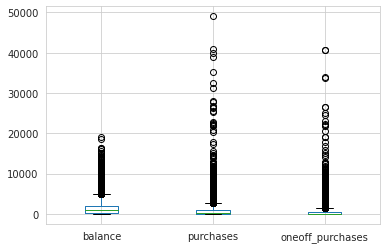

In [ ]:
#Outliers
boxplot = df.boxplot(column=['balance','purchases', 'oneoff_purchases'])
#boxplot = df.boxplot(column=['installments_purchases', 'cash_advance', 'credit_limit'])

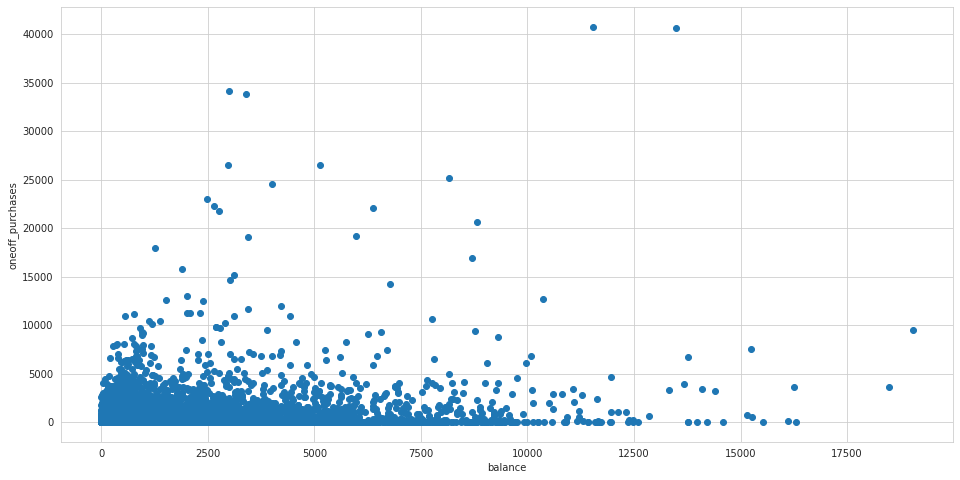

In [ ]:
fig, ax = plt.subplots(figsize = (16,8))
ax.scatter(df['balance'], df['oneoff_purchases'])
ax.set_xlabel('balance')
ax.set_ylabel('oneoff_purchases')
plt.show()

From only analyzing 3 columns we can see that there are outliers. So let's detect exactly these outliers.

In [ ]:
#Outliers
Y = df.iloc[:, 3:20] #getting numeric data
clf = KNN(contamination=0.18)
clf.fit(Y)
y_pred = clf.predict(Y)
df1 = df[y_pred == 1]


In [ ]:
df1 = df1.reset_index(drop=True)
df1

,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
0,C10002,2019-10-06,2020-07-04,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
1,C10007,2019-10-06,2020-10-30,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,0
2,C10016,2019-10-06,2020-07-07,6886.213231,1.000000,1611.70,0.00,1611.70,2301.491267,0.500000,0.000000,0.500000,0.166667,4,11,8000.0,1993.439277,2109.906490,0.000000,12,0
3,C10019,2019-10-06,2020-05-03,1989.072228,1.000000,504.35,166.00,338.35,0.000000,0.666667,0.083333,0.583333,0.000000,0,9,13000.0,1720.837373,744.613395,0.000000,12,0
4,C10020,2019-10-06,2020-06-30,3577.970933,1.000000,398.64,0.00,398.64,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,4000.0,1053.980464,12465.549380,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,C18987,2020-07-25,2020-06-12,1042.816735,0.625000,3950.00,3950.00,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0,3,3150.0,6274.982741,303.462882,0.000000,8,0
1504,C19081,2020-07-28,2020-08-08,2588.410789,0.888889,787.40,0.00,787.40,3762.650329,0.777778,0.000000,0.666667,0.555556,10,17,3000.0,1739.406636,1769.001229,0.000000,9,0
1505,C19098,2020-07-28,2020-06-26,2330.222764,1.000000,1320.00,0.00,1320.00,14926.790590,0.428571,0.000000,0.285714,0.571429,10,3,10000.0,8157.666434,283.362434,0.200000,7,0
1506,C19122,2020-07-29,2020-10-31,2150.940844,1.000000,1105.74,0.00,1105.74,2220.336732,1.000000,0.000000,0.857143,0.142857,7,13,2500.0,631.429223,2825.419309,0.000000,7,0


> We have **1508** outliers, we are not going to do any specific treatment, since later on, this data may help us to more easily identify any fraud.

## Question 1
### 1.1 Plot an histogram of the balance amount for all the customers

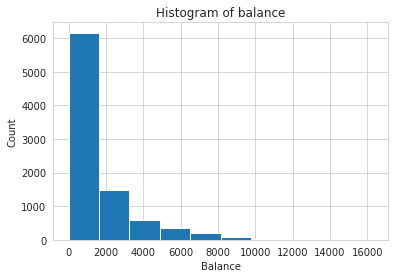

In [ ]:
#Histogram of the balance amount
plt.hist(df['balance'][df['balance']<17500])
plt.title('Histogram of balance')
plt.xlabel('Balance')
plt.ylabel('Count')
plt.show()


###1.2 Report any structure you find and any hypotheses you have about that structure.

As we can see from above graph, it's asymetric, the balance data is samller than 8000, distribution of balance is highly Right-skewed.

**Hypothesis**: balance are mostly within 7500



### 1.3 Report mean and median balance, grouped by year and month of activated_date.

In [ ]:
#1.3 Report mean and median balance, grouped by year and month of activated_date.
df.groupby(pd.Grouper(key = 'activated_date', freq = 'M')).mean() #mean group by month


,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
activated_date,,,,,,,,,,,,,,,,,,
2019-10-31,2482.234166,0.902319,1740.360569,1111.899988,628.628986,1310.741764,0.519864,0.271780,0.378178,0.139757,3.517923,20.501854,6489.122373,2673.028929,1326.862500,0.134101,11.699629,0.024722
2019-11-30,1846.847082,0.889626,1416.080283,921.795131,494.359497,1053.945424,0.522740,0.268336,0.361156,0.129528,3.001047,17.450262,5693.214660,2285.009094,940.405955,0.177453,11.726702,0.016754
2019-12-31,2016.605538,0.908930,1011.961634,604.858285,407.103349,1217.971081,0.506476,0.235433,0.379186,0.147193,3.742232,17.225547,5655.370157,1971.484631,914.991917,0.133581,11.667434,0.008055
2020-01-31,1853.211613,0.907144,970.905782,585.063296,385.842486,1080.429499,0.472665,0.217543,0.332246,0.148787,3.429696,14.525309,5007.272955,1829.722340,888.772692,0.126134,11.710911,0.004499
2020-02-29,1744.756667,0.894463,1172.434896,720.423724,452.049838,1020.611282,0.480342,0.236119,0.340003,0.134262,3.237819,16.004640,5125.290023,1978.747856,873.213070,0.145896,11.650812,0.009281
2020-03-31,1553.261113,0.874659,923.528011,515.731473,408.251054,909.909873,0.467993,0.213098,0.333395,0.131640,3.184946,14.677419,4670.413549,1665.525819,814.379125,0.161236,11.558065,0.004301
2020-04-30,1487.733269,0.883274,870.208733,501.380928,369.440238,960.144517,0.466106,0.195647,0.344569,0.142079,3.481900,13.104072,4223.930481,1616.793620,950.233330,0.134789,11.595023,0.004525
2020-05-31,1214.333732,0.862176,793.722597,441.884635,353.114517,815.448768,0.475013,0.153103,0.373583,0.130656,2.996781,12.778970,3492.650215,1381.055631,765.057318,0.151381,11.525751,0.003219
2020-06-30,939.789358,0.857770,708.385205,352.751929,355.633276,752.785775,0.492108,0.142867,0.395643,0.125355,3.124429,12.925799,2827.508879,1219.358542,677.052992,0.161923,11.550228,0.004566


In [ ]:
df.groupby(pd.Grouper(key = 'activated_date', freq = 'M')).median() #median group by month

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
activated_date,,,,,,,,,,,,,,,,,,
2019-10-31,1524.409377,1.0,601.350,202.0,100.000,36.336457,0.500000,0.083333,0.166667,0.000000,0,9,6000.0,1288.287239,609.206784,0.0,12,0
2019-11-30,1081.065726,1.0,517.830,175.5,102.630,0.000000,0.500000,0.083333,0.166667,0.000000,0,9,4500.0,1164.552612,442.215058,0.0,12,0
2019-12-31,1167.863521,1.0,437.600,89.0,94.200,55.212259,0.500000,0.083333,0.250000,0.083333,1,8,5000.0,1092.822745,447.234777,0.0,12,0
2020-01-31,1175.749847,1.0,372.160,70.0,63.030,73.993840,0.416667,0.083333,0.166667,0.083333,1,7,4000.0,993.289914,429.538814,0.0,12,0
2020-02-29,994.841733,1.0,371.550,100.0,40.200,43.673693,0.416667,0.083333,0.083333,0.083333,1,7,4250.0,1014.169542,349.664106,0.0,12,0
2020-03-31,828.954823,1.0,333.410,57.9,59.985,0.000000,0.416667,0.083333,0.083333,0.000000,0,6,3500.0,887.654775,291.341449,0.0,12,0
2020-04-30,910.141912,1.0,312.420,0.0,60.170,55.772939,0.416667,0.000000,0.145834,0.083333,1,6,3000.0,813.567794,367.676223,0.0,12,0
2020-05-31,734.557681,1.0,323.405,0.0,102.915,0.000000,0.422619,0.000000,0.250000,0.000000,0,6,3000.0,720.455342,287.882767,0.0,12,0
2020-06-30,475.265493,1.0,316.450,0.0,116.155,0.000000,0.500000,0.000000,0.250000,0.000000,0,7,2500.0,625.010165,240.295868,0.0,12,0


In [ ]:
df.groupby(pd.Grouper(key = 'activated_date', freq = 'Y')).mean() #mean group by year


,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
activated_date,,,,,,,,,,,,,,,,,,
2019-12-31,2098.099740,0.899897,1382.340687,875.603224,506.816172,1186.982467,0.516488,0.258535,0.372337,0.138501,3.404482,18.313711,5925.270287,2300.753602,1050.758612,0.149653,11.698823,0.016331
2020-12-31,1342.249165,0.867840,845.176544,474.410508,371.158531,892.283015,0.479456,0.179084,0.361145,0.133745,3.183948,13.207694,3898.066474,1496.557423,786.402268,0.155407,11.441665,0.004274


In [ ]:
df.groupby(pd.Grouper(key = 'activated_date', freq = 'Y')).median() #median group by year


,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
activated_date,,,,,,,,,,,,,,,,,,
2019-12-31,1212.426549,1.0,508.32,148.66,99.9,0.0,0.500000,0.083333,0.166667,0.0,0,9,5000.0,1181.316469,477.494152,0.0,12,0
2020-12-31,724.614301,1.0,320.00,0.00,82.9,0.0,0.444444,0.000000,0.166667,0.0,0,7,3000.0,746.172552,294.476980,0.0,12,0


### 2.1 Report in a table the following information for customers who activated their account and made their last  payment during 2020: cust_id (excluding letters), activated_date (in format YYYY-MM), last_payment_date (in format YYYY-MM-DD), cash_advance, credit_limit, and a calculated field of cash_advance as a percentage of credit_limit.

First, we must filter the data according to the date, then exclude the letters from *cust_id*, calculate the percentage and then put the data in a dataframe.


In [ ]:
filtered_df = df.loc[(df['activated_date'] >= '2020-01-01')
                     & (df['last_payment_date'] >= '2020-01-01')] #customers who activated their account and made their last payment during 2020
filtered_df['cust_id'] =filtered_df.cust_id.replace('C','',regex=True).astype('int') #excluding letters
filtered_df['activated_date'] = filtered_df['activated_date'].apply(lambda x: x.strftime('%Y-%m')) #format YYYY-MM
filtered_df['percetange_cash_credit_limit'] = (filtered_df['cash_advance']*100) / filtered_df['credit_limit'] #cash_advance percentage of credit_limit.
filtered_df['percetange_cash_credit_limit'] = filtered_df.percetange_cash_credit_limit.round(2) #round percentage
filtered_df['percetange_cash_credit_limit'] = filtered_df.percetange_cash_credit_limit.astype(str) # float to str
filtered_df['percetange_cash_credit_limit'] = filtered_df['percetange_cash_credit_limit'].astype(str) + '%' #adding '%'
filtered_df = filtered_df.iloc[:, [0,1,2,8,15,21]] #table
filtered_df

,cust_id,activated_date,last_payment_date,cash_advance,credit_limit,percetange_cash_credit_limit
2633,12709,2020-01,2020-05-08,2431.292076,8000.0,30.39%
2634,12710,2020-01,2020-05-26,0.000000,2000.0,0.0%
2635,12712,2020-01,2020-10-20,0.000000,3000.0,0.0%
2636,12713,2020-01,2020-08-22,0.000000,9000.0,0.0%
2637,12714,2020-01,2020-04-26,78.763096,1500.0,5.25%
...,...,...,...,...,...,...
8945,19186,2020-07,2020-11-03,0.000000,1000.0,0.0%
8946,19187,2020-07,2020-09-06,0.000000,1000.0,0.0%
8947,19188,2020-07,2020-06-03,0.000000,1000.0,0.0%
8948,19189,2020-07,2020-07-19,36.558778,500.0,7.31%


##Question 3
###3.1 Build a predictive model for fraud.

To build the model, we will first scale the data to reduce redundancy.

In [ ]:
X = df.iloc[:, 4:20] #getting numeric data
X

,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.173246,0.000000,12
4,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.173246,0.000000,6
8947,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
#normalized data
scale = StandardScaler()
X = scale.fit_transform(X)
X_data = pd.DataFrame(X, columns = ['balance_frequency',	'purchases',	'oneoff_purchases',	'installments_purchases',	'cash_advance',	'purchases_frequency',	'oneoff_purchases_frequency',	'purchases_installments_frequency',	'cash_advance_frequency',	'cash_advance_trx',	'purchases_trx',	'credit_limit',	'payments',	'minimum_payments',	'prc_full_payment',	'tenure'])
X_data

,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,-0.249434,-0.424900,-0.356934,-0.349079,-0.469205,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109651e-01,-0.525551,0.360680
1,0.134325,-0.469552,-0.356934,-0.454576,2.618767,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.932790e-02,0.234227,0.360680
2,0.518084,-0.107668,0.108889,-0.454576,-0.469205,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016528e-01,-0.525551,0.360680
3,-1.016953,0.232058,0.546189,-0.454576,-0.370575,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,-4.390642e-16,-0.525551,0.360680
4,0.518084,-0.462063,-0.347294,-0.454576,-0.469205,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657871e-01,-0.525551,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.518084,-0.333293,-0.356934,-0.132643,-0.469205,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960433,-0.486217,-3.498531e-01,1.183951,-4.122768
8946,0.518084,-0.329136,-0.356934,-0.122823,-0.469205,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960433,-0.503396,-4.390642e-16,-0.525551,-4.122768
8947,-0.185477,-0.401965,-0.356934,-0.294893,-0.469205,0.854576,-0.678661,0.760469,-0.675349,-0.476070,-0.390639,-0.960433,-0.570615,-3.354640e-01,0.329200,-4.122768
8948,-0.185477,-0.469552,-0.356934,-0.454576,-0.451684,-1.221758,-0.678661,-0.916995,0.157527,-0.182998,-0.591796,-1.097856,-0.580536,-3.469054e-01,0.329200,-4.122768


We are going to add a column that will contain the difference in days between activated_date and the minimun of actavated_date.

In [ ]:
day_difference = df.activated_date - df.activated_date.min() #new column

day = pd.DataFrame(day_difference)
day.reset_index(drop=True,inplace=True)
balance = pd.DataFrame(df.balance)
fraud = pd.DataFrame(df.fraud)

In [ ]:
datos = pd.concat([day, balance], axis=1,)
datos.rename(columns={'activated_date':'period_act_date',
                        'valance':'balance'},
               inplace=True)
Y_data = pd.concat([datos, X_data, fraud], axis=1,)
Y_data['period_act_date'] = Y_data['period_act_date'].astype('str')
Y_data['period_act_date'] =Y_data.period_act_date.replace('days','',regex=True).astype(int)
Y_data.info() #new dataframe with the predictors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   period_act_date                   8950 non-null   int64  
 1   balance                           8950 non-null   float64
 2   balance_frequency                 8950 non-null   float64
 3   purchases                         8950 non-null   float64
 4   oneoff_purchases                  8950 non-null   float64
 5   installments_purchases            8950 non-null   float64
 6   cash_advance                      8950 non-null   float64
 7   purchases_frequency               8950 non-null   float64
 8   oneoff_purchases_frequency        8950 non-null   float64
 9   purchases_installments_frequency  8950 non-null   float64
 10  cash_advance_frequency            8950 non-null   float64
 11  cash_advance_trx                  8950 non-null   float64
 12  purcha

### Exploring the data

In [ ]:
print ("Fraud")
print (Y_data.period_act_date[Y_data.fraud == 1].describe())
print ()
print ("Not Fraud")
print (Y_data.period_act_date[Y_data.fraud == 0].describe())

Fraud
count     70.000000
mean      84.614286
std       76.502021
min        2.000000
25%       20.250000
50%       54.500000
75%      130.750000
max      265.000000
Name: period_act_date, dtype: float64

Not Fraud
count    8880.000000
mean      149.455068
std        87.172241
min         0.000000
25%        73.000000
50%       150.000000
75%       225.000000
max       299.000000
Name: period_act_date, dtype: float64


> The ***Not Fraud*** statistics have a larger mean value, larger Q1,Q3 and larger outliers. 

> Let's look into more details to the time distribution of both classes (fraud and not fraud), as well as to aggregated values of balance count and amount, per day. We assume (based on observation of the time distribution of balance) that the time unit is day.

In [ ]:
tmp = Y_data.groupby(['period_act_date', 'fraud'])['balance'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df = pd.DataFrame(tmp)
df.columns = ['Day', 'fraud', 'Min', 'Max', 'Balance', 'Sum', 'Mean', 'Median', 'Var']
df.head()

,Day,fraud,Min,Max,Balance,Sum,Mean,Median,Var
0,0,0,22.063490,12136.219960,31,74262.403691,2395.561409,1666.670542,7.349523e+06
1,1,0,6.660517,7427.076941,35,85069.484444,2430.556698,1656.350781,4.273618e+06
2,2,0,0.000000,9381.255094,39,89601.151068,2297.465412,1576.305029,6.404403e+06
3,2,1,2990.422186,2990.422186,1,2990.422186,2990.422186,2990.422186,NaN
4,3,0,24.284970,14224.115410,27,93056.165004,3446.524630,2114.158683,1.475893e+07


### Features correlation

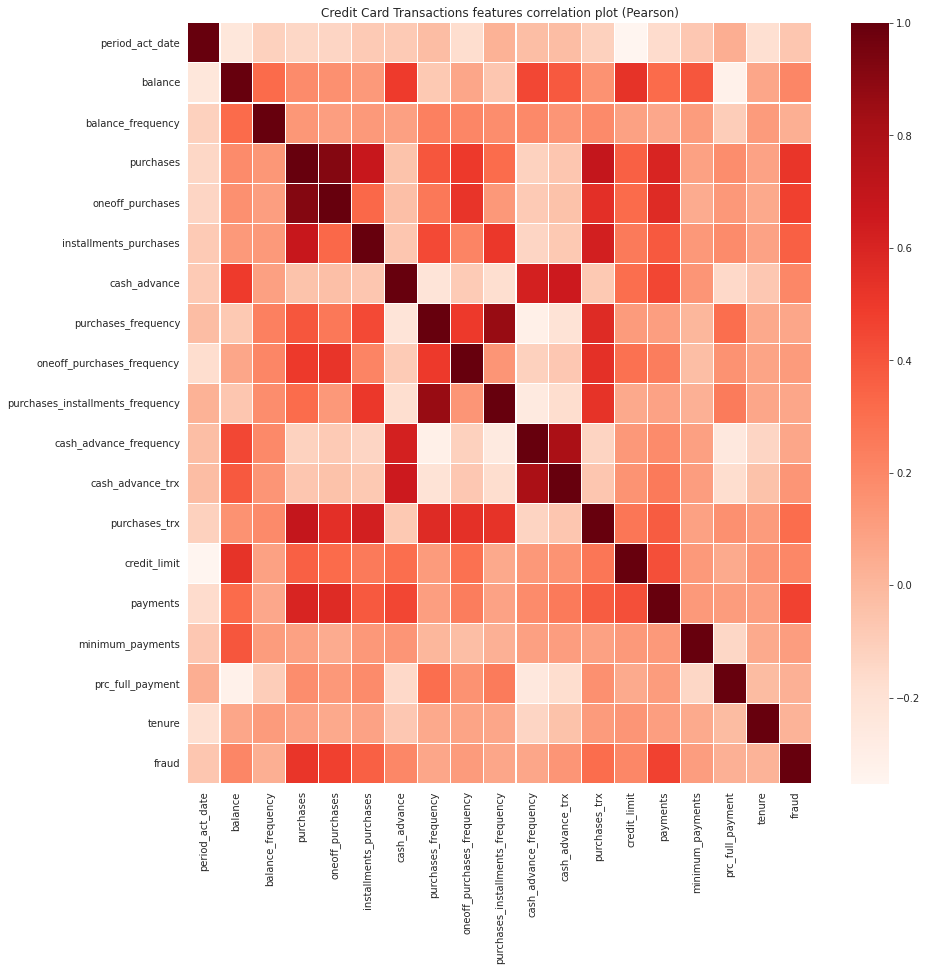

In [ ]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = Y_data.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

As expected, there is not much notable correlation between features **balance_frequency-tenure**. There are certain correlations between some of these features and **period_act_date** (inverse correlation with **credit_limit**) and **balance**(direct correlation with **cash_advance**, inverse correlation with **prc_full_payment**).

Let's plot the inverse correlated values on the same graph.

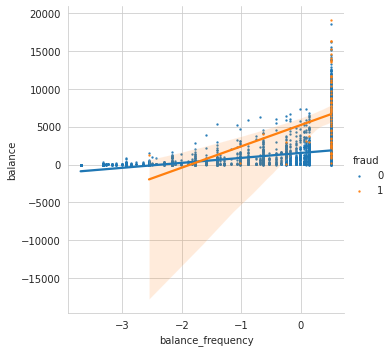

In [ ]:
s = sns.lmplot(x='balance_frequency', y='balance',data=Y_data, hue='fraud', fit_reg=True,scatter_kws={'s':2})
plt.show()

### Features density plot

<Figure size 432x288 with 0 Axes>

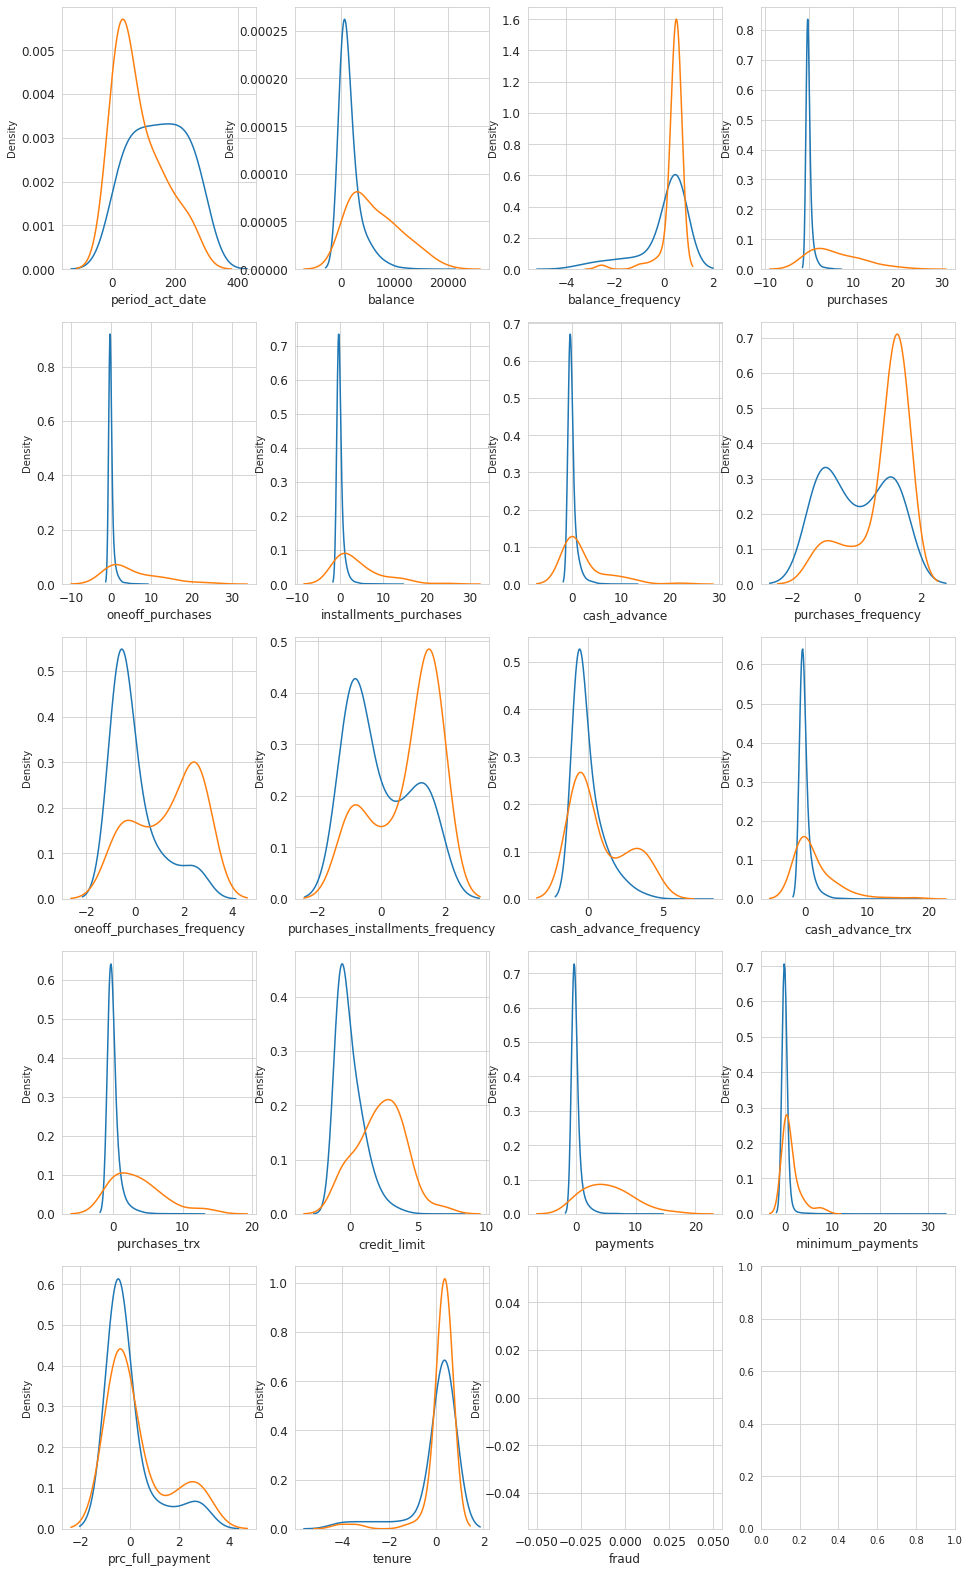

In [ ]:
var = Y_data.columns.values

i = 0
t0 = Y_data.loc[Y_data['fraud'] == 0]
t1 = Y_data.loc[Y_data['fraud'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(5,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(5,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Fraud = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Fraud = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

> For some of the features we can observe a good selectivity in terms of distribution for the two values of Class: oneoff_purchases_frequency, purchas_installments_frequency have clearly separated distributions for fraud values 0 and 1, payments, purchases_trx and purchases are partially separated, purchases_frequency,credit_limit have a quite distinct profile, whilst minimum_payments, prc_full_payment, tenure have similar profiles for the two values of fraud.

> In general, with just a few exceptions (Days and balance), the distribution of the features for legitimate transactions (values of fraud = 0) is centered around 0, sometimes with a long queue at one of the extremities. At the same time, the fraudulent (values of Class = 1) have a skewed (asymmetric) distribution.

### Predictive models

Let's define the predictor features and the target features. Categorical features, if any, are also defined. In our case, there are no categorical feature.

In [ ]:

target = 'fraud'
predictors = ['period_act_date', 'balance', 'balance_frequency', 'purchases', 'oneoff_purchases', 'installments_purchases', 'cash_advance', 'purchases_frequency', 'oneoff_purchases_frequency', 'purchases_installments_frequency',
              'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment', 'tenure']


#### Split data in train, test and validation set
Let's define train, validation and test sets.

In [ ]:
train_df, test_df = train_test_split(Y_data, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True )
train_df, valid_df = train_test_split(Y_data, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True )

###RandomForestClassifier

Let's run a model using the training set for training. Then, we will use the validation set for validation.

We will use as validation criterion GINI, which formula is GINI = 2 * (AUC) - 1, where AUC is the Receiver Operating Characteristic - Area Under Curve (ROC-AUC). Number of estimators is set to 100 and number of parallel jobs is set to 4.

We start by initializing the RandomForestClassifier.

In [ ]:
#RandomForest Classifier
clf = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)

> Let's train the RandonForestClassifier using the train_df data and fit function.



In [ ]:
clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                       oob_score=False, random_state=2018, verbose=False,
                       warm_start=False)

> Let's now predict the target values for the valid_df data, using predict function.



In [ ]:
preds = clf.predict(valid_df[predictors])


> Let's also visualize the features importance.

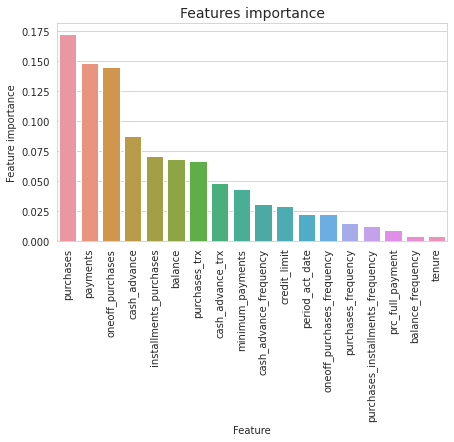

In [ ]:
#Features importance
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

The most important features are ***purchases, payments, oneoff_purchases and cash_advance***

###  Confusion matrix
Let's show a confusion matrix for the results we obtained

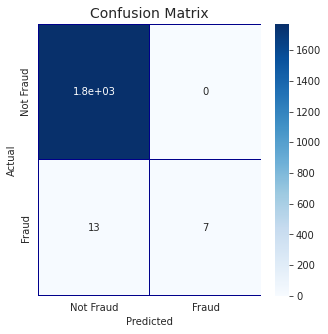

In [ ]:
#Confusion matrix
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

### Area under curve

In [ ]:
roc_auc_score(valid_df[target].values, preds)

0.675

The *ROC-AUC* score obtained with RandomForrestClassifier is 0.675. It's not a good result, so let's build another model.

### XGBoost

XGBoost is a gradient boosting algorithm. Let's prepare the model.

We initialize the DMatrix objects for training and validation, starting from the datasets. We also set some of the parameters used for the model tuning.

In [ ]:
#XGBoost
# Prepare the train and valid datasets
dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dvalid = xgb.DMatrix(valid_df[predictors], valid_df[target].values)
dtest = xgb.DMatrix(test_df[predictors], test_df[target].values)

#What to monitor (in this case, **train** and **valid**)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Set xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = RANDOM_STATE

In [ ]:
#train model
model = xgb.train(params, 
                dtrain, 
                MAX_ROUNDS, 
                watchlist, 
                early_stopping_rounds=EARLY_STOP, 
                maximize=True, 
                verbose_eval=VERBOSE_EVAL)

[0]	train-auc:0.809633	valid-auc:0.699449
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 50 rounds.
[50]	train-auc:0.947129	valid-auc:0.893814
Stopping. Best iteration:
[48]	train-auc:0.947049	valid-auc:0.893898



> The best validation score (*ROC-AUC*) was 0.893.

### Plot variable importance

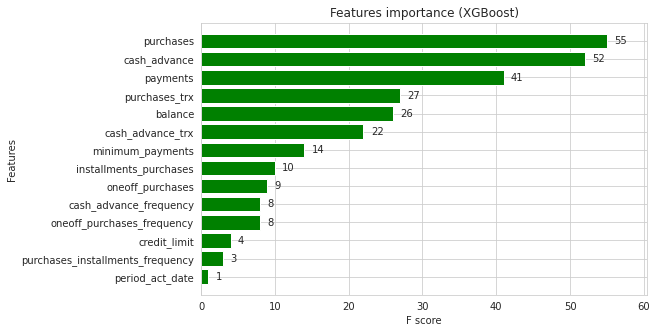

In [ ]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(model, height=0.8, title="Features importance (XGBoost)", ax=ax, color="green") 
plt.show()

The most important features are purchases, cash_advance and payments

#### Predict test set
We used the train and validation sets for training and validation. We will use the trained model now to predict the target value for the test set.

In [ ]:
preds = model.predict(dtest)

#### Area under curve
Let's calculate *ROC-AUC*.

In [ ]:
roc_auc_score(test_df[target].values, preds)

0.8846045197740113

The *AUC* score for the prediction of fresh data (test set) is 0.884.

###3.2 What explanatory variable was the most powerful predictor for fraud?

The most important feature was ***purchases***, in both models it was the most important variable.